In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
from src.prepare_df import prepare_df

In [15]:
df = pd.read_csv(
    "./data/candidate_datasets/pokemon_team_rocket_dataset/pokemon_team_rocket_dataset.csv",
    index_col="ID",
)
df = prepare_df(df)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     5000 non-null   int64   
 1   City                    5000 non-null   category
 2   Economic Status         5000 non-null   category
 3   Profession              5000 non-null   category
 4   Most Used Pokemon Type  5000 non-null   category
 5   Average Pokemon Level   5000 non-null   int64   
 6   Criminal Record         5000 non-null   bool    
 7   PokéBall Usage          5000 non-null   category
 8   Win Ratio               5000 non-null   int64   
 9   Number of Gym Badges    5000 non-null   int64   
 10  Is Pokemon Champion     5000 non-null   bool    
 11  Battle Strategy         5000 non-null   category
 12  Number of Migrations    5000 non-null   int64   
 13  Rare Item Holder        5000 non-null   bool    
 14  Debt to Kanto           

In [17]:
df.head()

,Age,City,Economic Status,Profession,Most Used Pokemon Type,Average Pokemon Level,Criminal Record,PokéBall Usage,Win Ratio,Number of Gym Badges,Is Pokemon Champion,Battle Strategy,Number of Migrations,Rare Item Holder,Debt to Kanto,Charity Participation,Team Rocket
ID,,,,,,,,,,,,,,,,,
0,27,Pewter City,Middle,Fisherman,Rock,50,False,DuskBall,51,1,False,Unpredictable,25,False,24511,True,False
1,55,Viridian City,Middle,PokéMart Seller,Grass,35,True,HealBall,53,2,False,Unpredictable,19,False,177516,True,True
2,14,Pallet Town,High,Police Officer,Poison,96,False,NetBall,76,5,False,Aggressive,18,False,85695,True,False
3,41,Cerulean City,Middle,Gym Leader Assistant,Dragon,23,False,UltraBall,27,0,False,Defensive,10,False,39739,True,False
4,15,Pallet Town,Middle,Gym Leader Assistant,Ground,16,True,HealBall,51,1,False,Aggressive,17,True,126923,False,True


In [21]:
df_numeric = df[df.select_dtypes(include=["int64"]).columns]
df_numeric.head()

,Age,Average Pokemon Level,Win Ratio,Number of Gym Badges,Number of Migrations,Debt to Kanto
ID,,,,,,
0,27,50,51,1,25,24511
1,55,35,53,2,19,177516
2,14,96,76,5,18,85695
3,41,23,27,0,10,39739
4,15,16,51,1,17,126923


In [22]:
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_numeric)

In [23]:
cls = PCA(n_components=2)
pcs = cls.fit_transform(df_standardized)
display(pcs)

array([[ 0.31866513,  0.54957844],
       [ 1.48511253,  0.06450123],
       [ 0.53364579,  1.07797098],
       ...,
       [ 0.60384005, -0.29470021],
       [-1.36227218,  0.06405567],
       [-1.50424813, -0.38106483]])

Text(0.5, 1.0, 'ACP dans le premier plan factoriel')

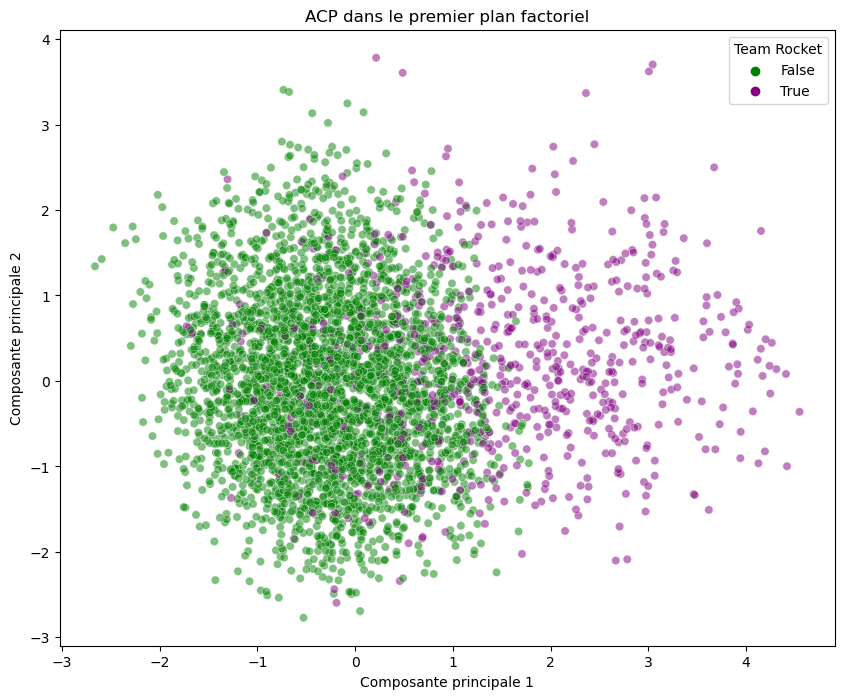

In [37]:
# Ajouter les composantes principales au DataFrame
df['PC1'] = pcs[:, 0]
df['PC2'] = pcs[:, 1]

# Créer le scatter plot avec seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Team Rocket', palette=['green', 'purple'], alpha=0.5)

# Ajouter des labels aux axes
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('ACP dans le premier plan factoriel')

In [35]:
print(f"Variances expliquées : {cls.explained_variance_}")
print(f"Pourcentages de variance expliquée : {cls.explained_variance_ratio_}")
print(f"Pourcentage total de variance expliquée : {cls.explained_variance_ratio_.sum()}")

Variances expliquées : [1.18561387 1.02068945]
Pourcentages de variance expliquée : [0.19756279 0.17008089]
Pourcentage total de variance expliquée : 0.3676436772632147


In [34]:
cls_2 = PCA(n_components=6)
pcs_2 = cls_2.fit_transform(df_standardized)
print(f"Variances expliquées : {cls_2.explained_variance_}")
print(f"Pourcentages de variance expliquée : {cls_2.explained_variance_ratio_}")

Variances expliquées : [1.18561387 1.02068945 1.00275307 0.9897106  0.98152898 0.82090427]
Pourcentages de variance expliquée : [0.19756279 0.17008089 0.16709209 0.16491878 0.16355545 0.13679001]
